In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import main_algo as main_algo

1D - Gaussian Test on Convex Core Program

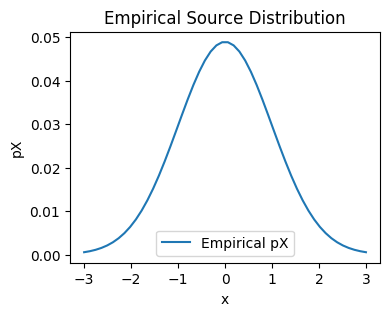

In [2]:
n = 50
xs = np.linspace(-3, 3, n)       
px_unnorm = np.exp(-0.5 * xs**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Empirical Source Distribution")
plt.legend()
plt.show()
m = 8
ys = np.linspace(-3, 3, m)


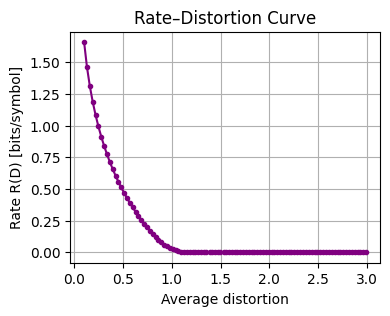

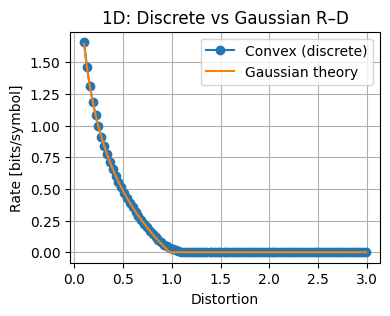

In [3]:
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.1, 3.0, 100)  
D_vals, Ivals = main_algo.run_rd_curve(pX, Dmat, D_targets)
main_algo.plot_rd_curve(D_vals, Ivals, title="Rate–Distortion Curve")

# empirical variance of your 1D source
sigma2 = np.sum(pX * xs**2)

def R_gaussian(D):
    return np.maximum(0.0, 0.5 * np.log(sigma2 / D))

D_dense = np.linspace(min(D_vals[D_vals>0]), max(D_vals), 200)
R_theory = R_gaussian(D_dense)

R_bits = np.array(Ivals) / np.log(2)
R_theory_bits = R_theory / np.log(2)

plt.figure(figsize=(4,3))
plt.plot(D_vals, R_bits, 'o-', label="Convex (discrete)")
plt.plot(D_dense, R_theory_bits, '-', label="Gaussian theory")
plt.xlabel("Distortion")
plt.ylabel("Rate [bits/symbol]")
plt.title("1D: Discrete vs Gaussian R–D")
plt.legend()
plt.grid(True)
plt.show()


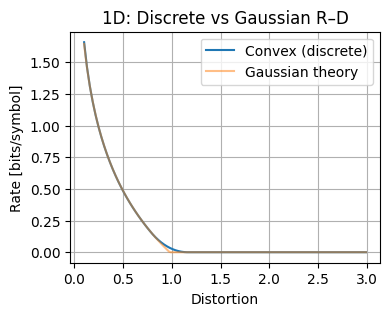

In [4]:
sigma2 = np.sum(pX * xs**2)

def R_gaussian(D):
    return np.maximum(0.0, 0.5 * np.log(sigma2 / D))

D_dense = np.linspace(min(D_vals[D_vals>0]), max(D_vals), 200)
R_theory = R_gaussian(D_dense)

R_bits = np.array(Ivals) / np.log(2)
R_theory_bits = R_theory / np.log(2)

plt.figure(figsize=(4,3))
plt.plot(D_vals, R_bits, '', label="Convex (discrete)")
plt.plot(D_dense, R_theory_bits, '-', label="Gaussian theory", alpha=0.5)
plt.xlabel("Distortion")
plt.ylabel("Rate [bits/symbol]")
plt.title("1D: Discrete vs Gaussian R–D")
plt.legend()
plt.grid(True)
plt.show()

2D - Gaussian Test on Convex Core Program

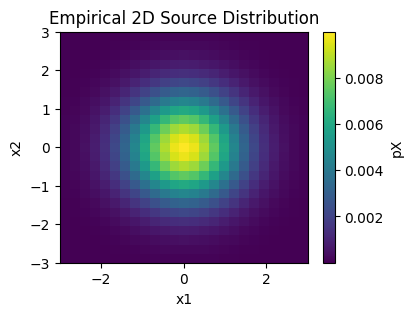

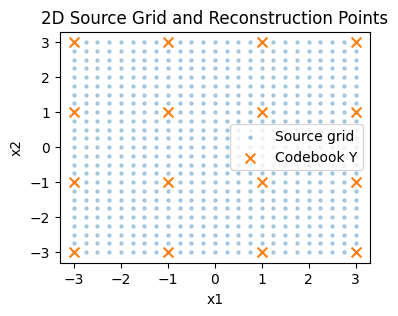

In [5]:
nx = 25
xs = np.linspace(-3, 3, nx)

X1, X2 = np.meshgrid(xs, xs)
X = np.column_stack([X1.ravel(), X2.ravel()])
n = X.shape[0]

px_unnorm = np.exp(-0.5 * (X[:, 0]**2 + X[:, 1]**2))
pX = px_unnorm / px_unnorm.sum()

plt.figure(figsize=(4, 3))
plt.imshow(pX.reshape(nx, nx), extent=[-3, 3, -3, 3], origin='lower', aspect='auto')
plt.colorbar(label="pX")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Empirical 2D Source Distribution")
plt.show()

m_side = 4
ys = np.linspace(-3, 3, m_side)
Y1, Y2 = np.meshgrid(ys, ys)
Y = np.column_stack([Y1.ravel(), Y2.ravel()])
m = Y.shape[0]

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.3, label="Source grid")
plt.scatter(Y[:, 0], Y[:, 1], s=50, marker='x', label="Codebook Y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("2D Source Grid and Reconstruction Points")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


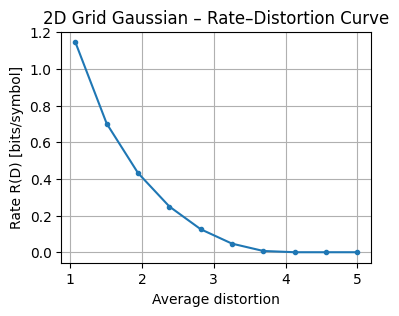

In [6]:
Dmat = main_algo.squared_euclidean_Dmat(X, Y)
D_targets = np.linspace(0.2, 5.0, 12)
D_vals, I_vals = main_algo.run_rd_curve(pX, Dmat, D_targets)
R_bits = I_vals / np.log(2)
plt.figure(figsize=(4, 3))
plt.plot(D_vals, R_bits, marker='.')
plt.xlabel("Average distortion")
plt.ylabel("Rate R(D) [bits/symbol]")
plt.title("2D Grid Gaussian – Rate–Distortion Curve")
plt.grid(True)
plt.show()

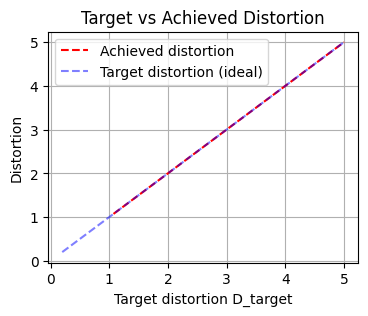

In [7]:
plt.figure(figsize=(4, 3))
plt.plot(D_targets, D_vals, 'r--', label="Achieved distortion")
plt.plot(D_targets, D_targets, 'b--', label="Target distortion (ideal)",alpha=0.5)
plt.xlabel("Target distortion D_target")
plt.ylabel("Distortion")
plt.title("Target vs Achieved Distortion")
plt.legend()
plt.grid(True)
plt.show()


Trimodal mixture on convex core program

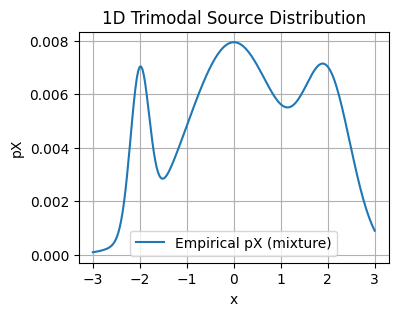

In [8]:
n = 200
xs = np.linspace(-3, 3, n)
weights = np.array([0.3, 0.4, 0.3])
means   = np.array([-2.0, 0.0, 2.0])
stds    = np.array([0.2, 1.0, 0.5])

px_unnorm = np.zeros_like(xs)
for w, mu, sigma in zip(weights, means, stds):
    px_unnorm += w * np.exp(-0.5 * ((xs - mu) / sigma)**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX (mixture)")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("1D Trimodal Source Distribution")
plt.legend()
plt.grid(True)
plt.show()
m = 16
ys = np.linspace(-3, 3, m)



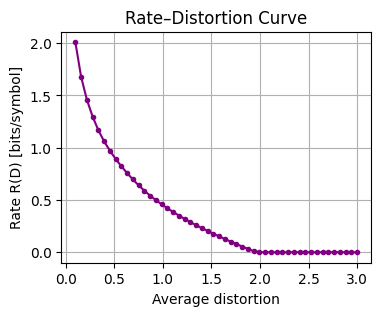

In [9]:
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.1, 3.0, 50)  
D_vals, Ivals = main_algo.run_rd_curve(pX, Dmat, D_targets)
main_algo.plot_rd_curve(D_vals, Ivals, title="Rate–Distortion Curve")

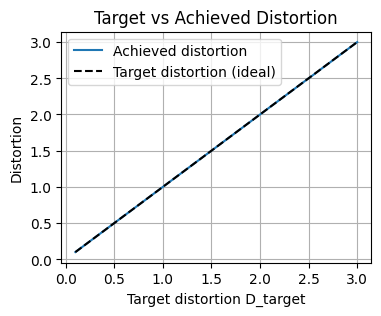

In [10]:
plt.figure(figsize=(4, 3))
plt.plot(D_targets, D_vals, '-', label="Achieved distortion")
plt.plot(D_targets, D_targets, 'k--', label="Target distortion (ideal)")
plt.xlabel("Target distortion D_target")
plt.ylabel("Distortion")
plt.title("Target vs Achieved Distortion")
plt.legend()
plt.grid(True)
plt.show()


1-D Gaussian with constraints test and analysis

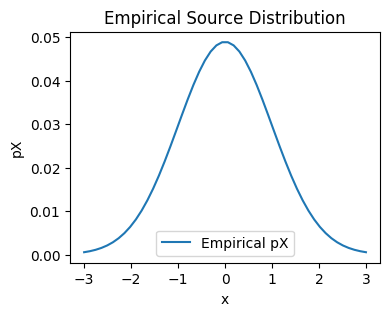

In [11]:
n = 50
xs = np.linspace(-3, 3, n)       
px_unnorm = np.exp(-0.5 * xs**2)
pX = px_unnorm / px_unnorm.sum()
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Empirical pX")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Empirical Source Distribution")
plt.legend()
plt.show()
m = 8
ys = np.linspace(-3, 3, m)


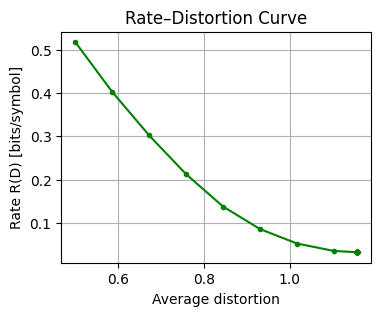

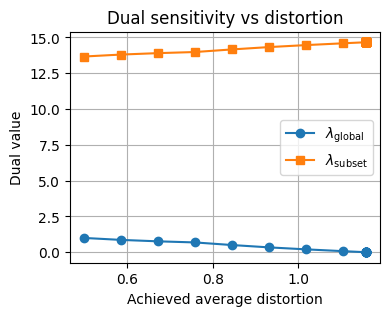

In [12]:
subset_idx = np.where(np.abs(xs) < 0.1)[0]
D_prime = 0.015
Dmat = main_algo.squared_euclidean_Dmat(xs, ys)
D_targets = np.linspace(0.5, 3.0, 30)

(D_vals,I_vals,dual_global,dual_subset) = main_algo.run_rd_curve_with_fidelity(pX, Dmat, D_targets, Dprime=D_prime, subset_idx=subset_idx)

main_algo.plot_rd_curve_with_fidelity(D_vals, I_vals, title="Rate–Distortion Curve")
main_algo.plot_dual_sensitivity(D_vals, dual_global, dual_subset, title="Dual sensitivity vs distortion")


In [13]:
D_target = 0.6
res = main_algo.convex_solve_rd(D_target, n, m, pX, Dmat)
ents = main_algo.compute_entropies_from_solution(res, pX)
print("H(Y):", ents["H_Y"])
print("H(Y|X):", ents["H_Y_given_X"])
print("I_emp (from entropies):", ents["I_emp"])
print("I_opt (CVX):", res["I_opt"])


H(Y): 1.085566783851021
H(Y|X): 0.8417624542993116
I_emp (from entropies): 0.2438043295517094
I_opt (CVX): 0.2438043295717809


Main algorithm + Updating Codebook on multi-gaussian source

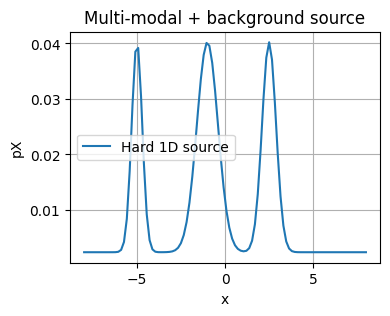

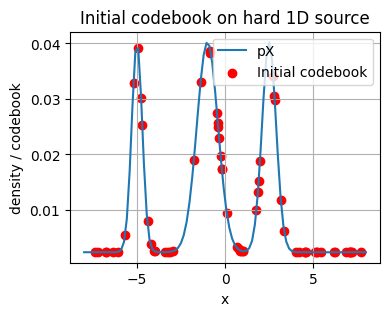

In [14]:

n = 100
xs = np.linspace(-8, 8, n)


weights = np.array([0.25, 0.25, 0.25, 0.25])
means   = np.array([-5.0, -1.0, 2.5])  
stds    = np.array([0.3, 0.6, 0.4])

px_unnorm = np.zeros_like(xs)

for w, mu, sigma in zip(weights[:3], means, stds):
    px_unnorm += w * np.exp(-0.5 * ((xs - mu) / sigma)**2)

px_unnorm += weights[3] * (1.0 / (xs.max() - xs.min()))

pX = px_unnorm / px_unnorm.sum()

plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Hard 1D source")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Multi-modal + background source")
plt.legend()
plt.grid(True)
plt.show()


m = 64
ys = np.random.uniform(-8, 8, size=m)
ys = np.sort(ys)

plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="pX")
plt.scatter(ys, np.interp(ys, xs, pX), color="red", label="Initial codebook")
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("Initial codebook on hard 1D source")
plt.legend()
plt.grid(True)
plt.show()


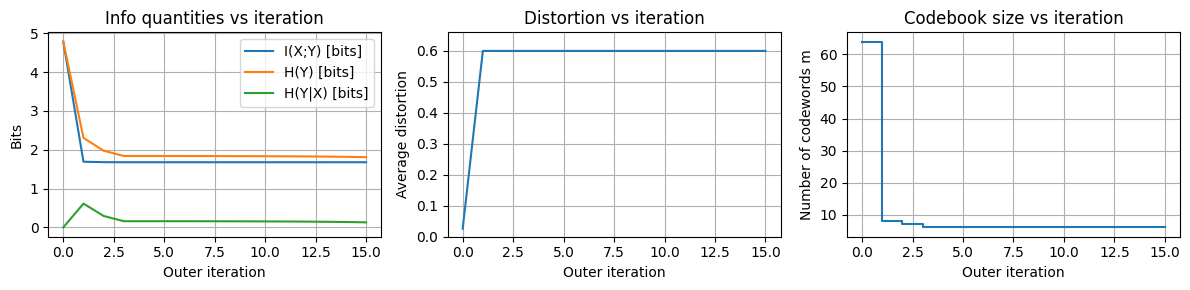

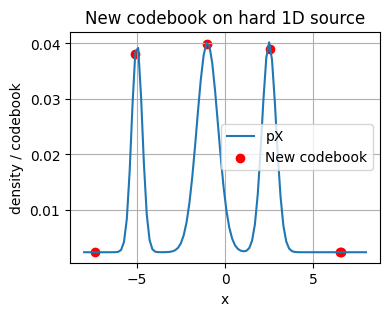

In [15]:
subset_idx = np.where(np.abs(xs) < 1.0)[0]
ys_new, I_list, D_list, H_Y_list, H_YX_list, m_list = main_algo.run_main(ys, xs, pX, num_iters=15, tol=1e-8, Dprime=0.6, D_target=0.6, subset_idx=subset_idx)
main_algo.plot_mains(I_list, D_list, H_Y_list, H_YX_list, m_list, D_target=0.6)
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="pX")
plt.scatter(ys_new, np.interp(ys_new, xs, pX), color="red", label="New codebook")
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("New codebook on hard 1D source")
plt.legend()
plt.grid(True)
plt.show()


Main algorithm + Updating Codebook on randomized source

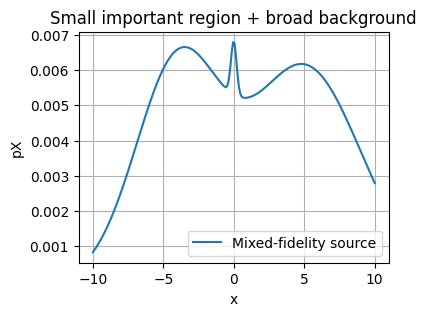

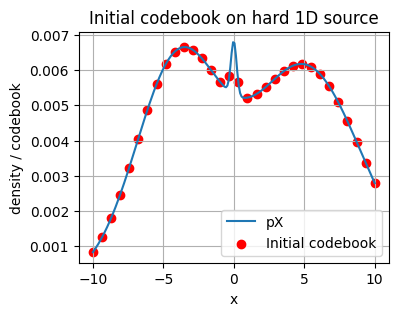

In [16]:

n = 200
xs = np.linspace(-10, 10, n)


w_spike = 0.2
mu_spike = 0.0
sigma_spike = 0.2
spike = np.exp(-0.5 * (xs - mu_spike)**2 / sigma_spike**2)


w_bg = 0.8
bg = np.exp(-0.5 * (xs + 4.0)**2 / 3.0**2) + np.exp(-0.5 * (xs - 5.0)**2 / 4.0**2)

px_unnorm = w_spike * spike + w_bg * bg
pX = px_unnorm / px_unnorm.sum()

plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="Mixed-fidelity source")
plt.xlabel("x")
plt.ylabel("pX")
plt.title("Small important region + broad background")
plt.legend()
plt.grid(True)
plt.show()


m = 32
ys = np.linspace(-10, 10, m)
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="pX")
plt.scatter(ys, np.interp(ys, xs, pX), color="red", label="Initial codebook")
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("Initial codebook on hard 1D source")
plt.legend()
plt.grid(True)
plt.show()


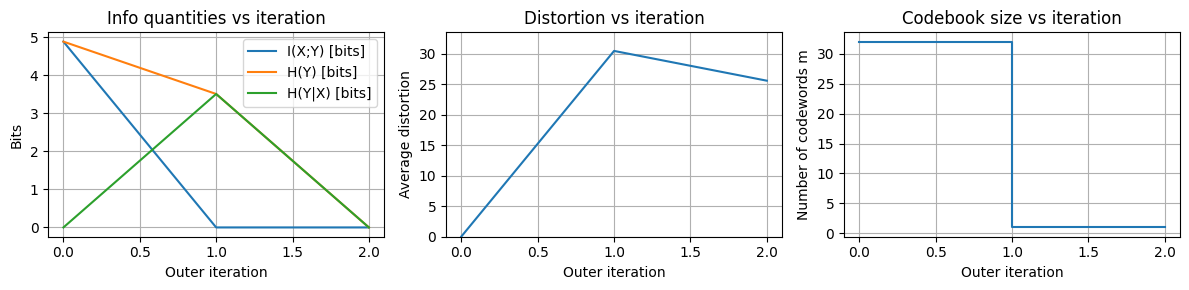

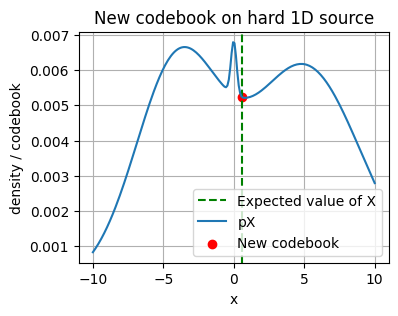

In [17]:
subset_idx = np.where(np.abs(xs) < 0.1)[0]
ys_new, I_list, D_list, H_Y_list, H_YX_list, m_list = main_algo.run_main(ys, xs, pX, num_iters=10, tol=1e-8, Dprime=0.2, D_target=30.5, subset_idx=subset_idx)
main_algo.plot_mains(I_list, D_list, H_Y_list, H_YX_list, m_list, D_target=30.5)
plt.figure(figsize=(4, 3))
y_mean = np.sum(pX * xs)
plt.axvline(y_mean, color='green', linestyle='--', label='Expected value of X')
plt.plot(xs, pX, label="pX")
plt.scatter(ys_new, np.interp(ys_new, xs, pX), color="red", label="New codebook")
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("New codebook on hard 1D source")
plt.legend()
plt.grid(True)
plt.show()


Main algorithm + Updating Codebook on 2D multi-gaussian source

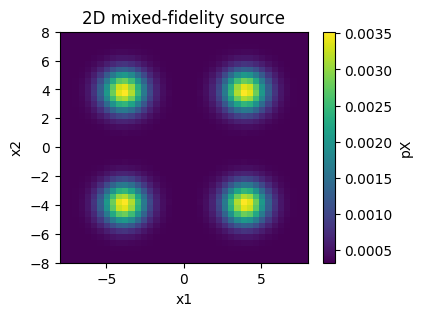

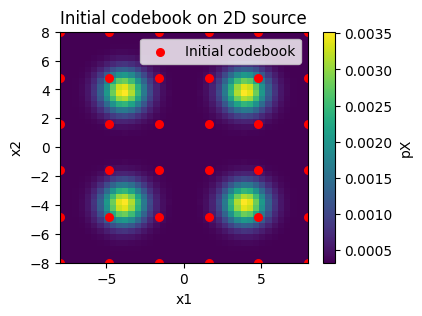

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import main_algo  

# 2D grid
nx = ny = 40
x1 = np.linspace(-8, 8, nx)
x2 = np.linspace(-8, 8, ny)
X1, X2 = np.meshgrid(x1, x2)         
X = np.column_stack([X1.ravel(), X2.ravel()])  
n = X.shape[0]


means = np.array([
    [-4.0, -4.0],
    [ 4.0, -4.0],
    [-4.0,  4.0],
    [ 4.0,  4.0],
])
cov = 1.0 * np.eye(2)

px_unnorm = np.zeros(n)
for mu in means:
    dx = X - mu
    px_unnorm += np.exp(-0.5 * np.sum(dx @ np.linalg.inv(cov) * dx, axis=1))


px_unnorm += 0.1
pX = px_unnorm / px_unnorm.sum()


plt.figure(figsize=(4, 3))
plt.imshow(
    pX.reshape(nx, ny),
    extent=[x1.min(), x1.max(), x2.min(), x2.max()],
    origin="lower",
    aspect="auto"
)
plt.colorbar(label="pX")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("2D mixed-fidelity source")
plt.grid(False)
plt.show()


m_side = 6
ys1 = np.linspace(-8, 8, m_side)
ys2 = np.linspace(-8, 8, m_side)
Y1, Y2 = np.meshgrid(ys1, ys2)
ys = np.column_stack([Y1.ravel(), Y2.ravel()])  

plt.figure(figsize=(4, 3))
plt.imshow(
    pX.reshape(nx, ny),
    extent=[x1.min(), x1.max(), x2.min(), x2.max()],
    origin="lower",
    aspect="auto"
)
plt.colorbar(label="pX")
plt.scatter(ys[:, 0], ys[:, 1], color="red", s=30, label="Initial codebook")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Initial codebook on 2D source")
plt.legend()
plt.grid(False)
plt.show()


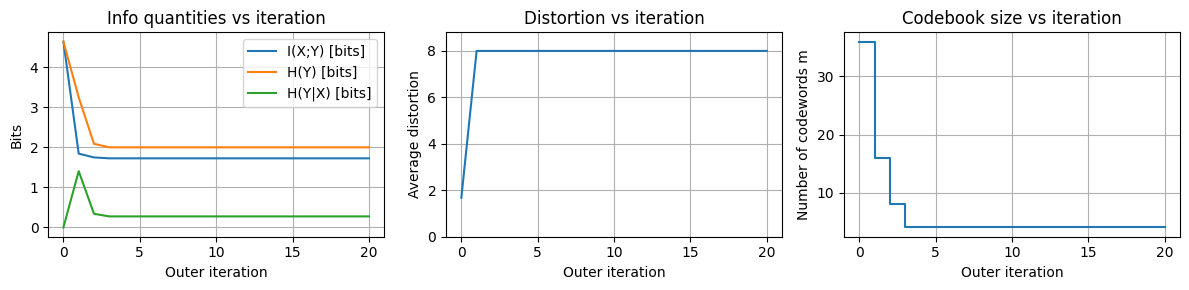

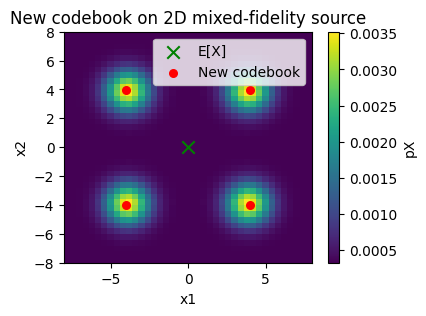

In [19]:
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
subset_idx = np.where(r < 2.0)[0]

Dprime = 1.0   
D_target = 8.0 

ys_new, I_list, D_list, H_Y_list, H_YX_list, m_list = main_algo.run_main(
    ys,         
    X,          
    pX,          
    num_iters=20,
    tol=1e-8,
    Dprime=Dprime,
    D_target=D_target,
    subset_idx=subset_idx,
)

main_algo.plot_mains(I_list, D_list, H_Y_list, H_YX_list, m_list, D_target=D_target)

plt.figure(figsize=(4, 3))
plt.imshow(
    pX.reshape(nx, ny),
    extent=[x1.min(), x1.max(), x2.min(), x2.max()],
    origin="lower",
    aspect="auto"
)
plt.colorbar(label="pX")

x_mean = (pX[:, None] * X).sum(axis=0)
plt.scatter(x_mean[0], x_mean[1], color="green", marker="x",
            s=80, label="E[X]")

plt.scatter(ys_new[:, 0], ys_new[:, 1],
            color="red", s=30, label="New codebook")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("New codebook on 2D mixed-fidelity source")
plt.legend()
plt.grid(False)
plt.show()


Comparison with Lloyd algorithm

In [20]:
def run_lloyd_baseline(xs, pX, m, num_iters=50, tol=1e-6, ys_init=None, subset_idx=None):
    xs_arr = np.asarray(xs)
    if xs_arr.ndim == 1:
        X = xs_arr[:, None]
    else:
        X = xs_arr
    n, d = X.shape

    if ys_init is None:
        if d == 1:
            ys_current = np.linspace(xs_arr.min(), xs_arr.max(), m)
            Y = ys_current[:, None]
        else:
            raise ValueError("Provide ys_init for d > 1.")
    else:
        ys_current = np.asarray(ys_init).copy()
        assert ys_current.shape[0] == m
        if ys_current.ndim == 1:
            Y = ys_current[:, None]
        else:
            Y = ys_current

    I_list, D_list, H_Y_list, H_YX_list, m_list = [], [], [], [], []
    prev_D = None

    for it in range(num_iters):
        Dmat = main_algo.squared_euclidean_Dmat(X, Y)
        assign = np.argmin(Dmat, axis=1)

        Q = np.zeros((n, m))
        Q[np.arange(n), assign] = 1.0

        pY = pX @ Q
        avg_dist = np.sum(pX * np.min(Dmat, axis=1))

        res = {"Q": Q, "pY": pY}
        ents = main_algo.compute_entropies_from_solution(res, pX)

        I_list.append(ents["I_emp"])
        D_list.append(avg_dist)
        H_Y_list.append(ents["H_Y"])
        H_YX_list.append(ents["H_Y_given_X"])
        m_list.append(m)

        if prev_D is not None and abs(prev_D - avg_dist) < tol:
            break
        prev_D = avg_dist

        for j in range(m):
            mask_j = (assign == j)
            mass_j = np.sum(pX[mask_j])
            if mass_j > 0:
                Y[j] = np.sum(pX[mask_j, None] * X[mask_j], axis=0) / mass_j

    if d == 1:
        ys_final = Y.squeeze()
    else:
        ys_final = Y

    return ys_final, I_list, D_list, H_Y_list, H_YX_list, m_list


In [21]:
n = 100
xs = np.linspace(-8, 8, n)

weights = np.array([0.25, 0.25, 0.25, 0.25])
means   = np.array([-5.0, -1.0, 2.5])
stds    = np.array([0.3, 0.6, 0.4])

px_unnorm = np.zeros_like(xs)
for w, mu, sigma in zip(weights[:3], means, stds):
    px_unnorm += w * np.exp(-0.5 * ((xs - mu) / sigma)**2)
px_unnorm += weights[3] * (1.0 / (xs.max() - xs.min()))

pX = px_unnorm / px_unnorm.sum()

m = 16
ys = np.random.uniform(-8, 8, size=m)
ys = np.sort(ys)


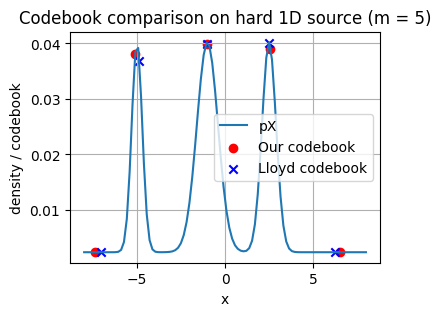

=== Final comparison (bits) ===
Our method : I(X;Y) = 1.6777 bits, H(Y) = 1.7969 bits, final Distortion = 0.6000
Lloyd      : I(X;Y) = 1.9099 bits, H(Y) = 1.9099 bits, final Distortion = 0.4170


In [22]:
subset_idx = np.where(np.abs(xs) < 1.0)[0]

ys_mine, I_list_mine, D_list_mine, H_Y_list_mine, H_YX_list_mine, m_list_mine = main_algo.run_main(
    ys, xs, pX, num_iters=15, tol=1e-8,
    Dprime=0.6, D_target=0.6, subset_idx=subset_idx
)

m_match = len(ys_mine)

ys_lloyd, I_L, D_L, H_Y_L, H_YX_L, m_L = run_lloyd_baseline(
    xs, pX, m=m_match, num_iters=100, tol=1e-8, ys_init=None
)

plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="pX")
plt.scatter(ys_mine,  np.interp(ys_mine,  xs, pX), color="red",   label="Our codebook")
plt.scatter(ys_lloyd, np.interp(ys_lloyd, xs, pX), color="blue",  label="Lloyd codebook", marker='x')
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("Codebook comparison on hard 1D source (m = %d)" % m_match)
plt.legend()
plt.grid(True)
plt.show()

I_mine_final   = I_list_mine[-1]
H_Y_mine_final = H_Y_list_mine[-1]
D_mine_final   = D_list_mine[-1]

I_L_final      = I_L[-1]
H_Y_L_final    = H_Y_L[-1]
D_L_final      = D_L[-1]

print("=== Final comparison (bits) ===")
print(f"Our method : I(X;Y) = {I_mine_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_mine_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_mine_final:.4f}")

print(f"Lloyd      : I(X;Y) = {I_L_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_L_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_L_final:.4f}")


In [23]:

n = 200
xs = np.linspace(-10, 10, n)

w_spike = 0.2
mu_spike = 0.0
sigma_spike = 0.2
spike = np.exp(-0.5 * (xs - mu_spike)**2 / sigma_spike**2)

w_bg = 0.8
bg = np.exp(-0.5 * (xs + 4.0)**2 / 3.0**2) + np.exp(-0.5 * (xs - 5.0)**2 / 4.0**2)

px_unnorm = w_spike * spike + w_bg * bg
pX = px_unnorm / px_unnorm.sum()



m = 32
ys = np.linspace(-10, 10, m)

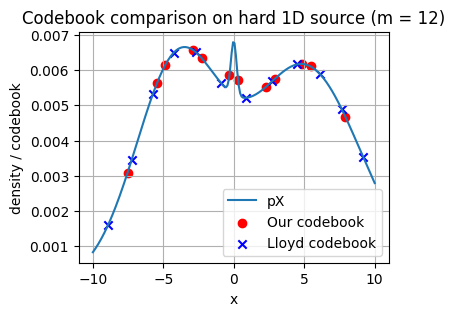

=== Final comparison (bits) ===
Our method : I(X;Y) = 1.8806 bits, H(Y) = 3.4789 bits, final Distortion = 1.6000
Lloyd      : I(X;Y) = 3.5125 bits, H(Y) = 3.5125 bits, final Distortion = 0.2347


In [24]:
subset_idx = np.where(np.abs(xs) < 1.0)[0]

ys_mine, I_list_mine, D_list_mine, H_Y_list_mine, H_YX_list_mine, m_list_mine = main_algo.run_main(
    ys, xs, pX, num_iters=15, tol=1e-8,
    Dprime=1.6, D_target=1.6, subset_idx=subset_idx
)


m_match = len(ys_mine)

ys_lloyd, I_L, D_L, H_Y_L, H_YX_L, m_L = run_lloyd_baseline(
    xs, pX, m=m_match, num_iters=100, tol=1e-8, ys_init=None  
)
plt.figure(figsize=(4, 3))
plt.plot(xs, pX, label="pX")
plt.scatter(ys_mine,  np.interp(ys_mine,  xs, pX), color="red",   label="Our codebook")
plt.scatter(ys_lloyd, np.interp(ys_lloyd, xs, pX), color="blue",  label="Lloyd codebook", marker='x')
plt.xlabel("x")
plt.ylabel("density / codebook")
plt.title("Codebook comparison on hard 1D source (m = %d)" % m_match)
plt.legend()
plt.grid(True)
plt.show()

I_mine_final   = I_list_mine[-1]       
H_Y_mine_final = H_Y_list_mine[-1]      
D_mine_final   = D_list_mine[-1]       


I_L_final      = I_L[-1]                
H_Y_L_final    = H_Y_L[-1]   
D_L_final    = D_L[-1]             

print("=== Final comparison (bits) ===")
print(f"Our method : I(X;Y) = {I_mine_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_mine_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_mine_final:.4f}")

print(f"Lloyd      : I(X;Y) = {I_L_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_L_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_L_final:.4f}")

In [25]:
def get_final_soft_encoder(xs, pX, ys_final, D_target, Dprime=None, subset_idx=None):
    X = np.asarray(xs)
    if X.ndim == 1:
        X = X[:, None]
    Y = np.asarray(ys_final)
    if Y.ndim == 1:
        Y = Y[:, None]
    n = X.shape[0]
    m = Y.shape[0]
    Dmat = main_algo.squared_euclidean_Dmat(X, Y)
    res = main_algo.convex_solve_rd_with_fidelity(
        D_target,
        n,
        m,
        pX,
        Dmat,
        Dprime=Dprime,
        subset_idx=subset_idx,
    )
    return res, Dmat

def round_Q_to_deterministic(res, pX, Dmat):
    Q_soft = res["Q"]
    n, m = Q_soft.shape
    assign = np.argmax(Q_soft, axis=1)
    Q_det = np.zeros_like(Q_soft)
    Q_det[np.arange(n), assign] = 1.0
    H_Y_det, H_YX_det, I_det, D_det = main_algo.compute_metrics_from_Q(Q_det, pX, Dmat)
    return {
        "Q_det": Q_det,
        "H_Y_det": H_Y_det,
        "H_YX_det": H_YX_det,
        "I_det": I_det,
        "D_det": D_det,
    }

I_mine_final   = I_list_mine[-1]
H_Y_mine_final = H_Y_list_mine[-1]
D_mine_final   = D_list_mine[-1]
I_L_final      = I_L[-1]
H_Y_L_final    = H_Y_L[-1]
D_L_final      = D_L[-1]

print("=== Soft encoder comparison (bits) ===")
print(f"Our method : I(X;Y) = {I_mine_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_mine_final/np.log(2):.4f} bits, "
      f"Distortion = {D_mine_final:.4f}")
print(f"Lloyd      : I(X;Y) = {I_L_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_L_final/np.log(2):.4f} bits, "
      f"Distortion = {D_L_final:.4f}")

res_soft, Dmat_final = get_final_soft_encoder(
    xs, pX, ys_mine, D_target=1.6, Dprime=1.6, subset_idx=subset_idx
)
det_metrics = round_Q_to_deterministic(res_soft, pX, Dmat_final)

print("\n=== Our method after argmax rounding (bits) ===")
print(f"I_det = {det_metrics['I_det']/np.log(2):.4f} bits, "
      f"H(Y)_det = {det_metrics['H_Y_det']/np.log(2):.4f} bits, "
      f"H(Y|X)_det = {det_metrics['H_YX_det']/np.log(2):.4e} bits, "
      f"Distortion_det = {det_metrics['D_det']:.4f}")


=== Soft encoder comparison (bits) ===
Our method : I(X;Y) = 1.8806 bits, H(Y) = 3.4789 bits, Distortion = 1.6000
Lloyd      : I(X;Y) = 3.5125 bits, H(Y) = 3.5125 bits, Distortion = 0.2347

=== Our method after argmax rounding (bits) ===
I_det = 2.9317 bits, H(Y)_det = 2.9317 bits, H(Y|X)_det = 4.3849e-10 bits, Distortion_det = 0.6626


In [26]:
# ===== 2D mixed-fidelity source: four clusters + important center region =====
import numpy as np
import matplotlib.pyplot as plt
import main_algo

nx = ny = 40
x1 = np.linspace(-8, 8, nx)
x2 = np.linspace(-8, 8, ny)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack([X1.ravel(), X2.ravel()])
n = X.shape[0]

means = np.array([
    [-4.0, -4.0],
    [ 4.0, -4.0],
    [-4.0,  4.0],
    [ 4.0,  4.0],
])
cov = 1.0 * np.eye(2)

px_unnorm = np.zeros(n)
for mu in means:
    dx = X - mu
    px_unnorm += np.exp(-0.5 * np.sum(dx @ np.linalg.inv(cov) * dx, axis=1))

px_unnorm += 0.1

pX = px_unnorm / px_unnorm.sum()

m_side = 6
ys1 = np.linspace(-8, 8, m_side)
ys2 = np.linspace(-8, 8, m_side)
Y1, Y2 = np.meshgrid(ys1, ys2)
ys = np.column_stack([Y1.ravel(), Y2.ravel()])


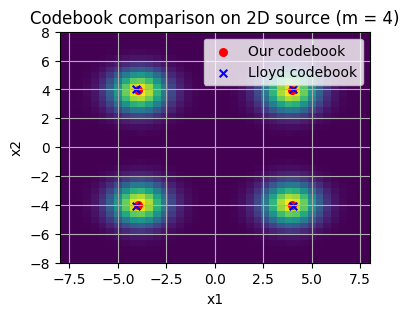

=== Final comparison (bits) ===
Our method : I(X;Y) = 1.7247 bits, H(Y) = 2.0000 bits, final Distortion = 8.0000
Lloyd      : I(X;Y) = 2.0000 bits, H(Y) = 2.0000 bits, final Distortion = 6.7599


In [27]:
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
subset_idx = np.where(r < 2.0)[0]

Dprime = 1.0
D_target = 8.0

ys_mine, I_list, D_list, H_Y_list, H_YX_list, m_list = main_algo.run_main(
    ys,
    X,
    pX,
    num_iters=20,
    tol=1e-8,
    Dprime=Dprime,
    D_target=D_target,
    subset_idx=subset_idx,
)

m_match = ys_mine.shape[0]

ys_lloyd, I_L, D_L, H_Y_L, H_YX_L, m_L = run_lloyd_baseline(
    X, pX, m=m_match, num_iters=100, tol=1e-8, ys_init=ys_mine
)

plt.figure(figsize=(4, 3))
plt.imshow(
    pX.reshape(nx, ny),
    extent=[x1.min(), x1.max(), x2.min(), x2.max()],
    origin="lower",
    aspect="auto"
)
plt.scatter(ys_mine[:, 0], ys_mine[:, 1], color="red", s=30, label="Our codebook")
plt.scatter(ys_lloyd[:, 0], ys_lloyd[:, 1], color="blue", s=30, label="Lloyd codebook", marker='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Codebook comparison on 2D source (m = %d)" % m_match)
plt.legend()
plt.grid(True)
plt.show()

I_mine_final = I_list[-1]
H_Y_mine_final = H_Y_list[-1]
D_mine_final = D_list[-1]

I_L_final = I_L[-1]
H_Y_L_final = H_Y_L[-1]
D_L_final = D_L[-1]

print("=== Final comparison (bits) ===")
print(f"Our method : I(X;Y) = {I_mine_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_mine_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_mine_final:.4f}")

print(f"Lloyd      : I(X;Y) = {I_L_final/np.log(2):.4f} bits, "
      f"H(Y) = {H_Y_L_final/np.log(2):.4f} bits, "
      f"final Distortion = {D_L_final:.4f}")
